<a href="https://colab.research.google.com/github/pratikagithub/All-About-Data-Analyst/blob/main/Stock_Market_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock market portfolio optimization is the process of selecting the best combination of stocks to maximize returns while minimizing the risk, based on historical performance data and financial metrics.

Stock market portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification. Using techniques such as Modern Portfolio Theory (MPT), we can construct an efficient portfolio that relies on the efficient frontier to represent the optimal trade-off between risk and return.

The expected results from stock market portfolio optimization include identifying the portfolio with the highest Sharpe ratio, which indicates the best risk-adjusted return and provides a clear allocation strategy for the selected stocks to achieve long-term investment goals.

To get started with stock market portfolio optimization, we need to collect data about the stock market performance over time. I will collect real-time stock market data using the yfinance API.

Now, let’s get started with the task of stock market portfolio optimization by importing the necessary Python libraries and collecting the stock market data using the yfinance API. If you are about to use this API for the first time, you can install it on your Python environment by executing the command below on your terminal or command prompt:

pip install yfinance

Now, let’s collect the stock market data of some popular Indian companies:



In [1]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
from google.colab import files

uploaded = files.upload()

# Define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# List of stock tickers to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# Flatten the multi-index columns to single level
data.columns = [' '.join(col).strip() for col in data.columns.values]

# Reset the index to ensure 'Date' becomes a column
data.reset_index(inplace=True)

# Check the columns to ensure 'Date' is present
print(data.columns)

# Melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name='Attribute', value_name='Value')

# Extract Ticker from the column names by splitting
data_melted['Ticker'] = data_melted['Attribute'].apply(lambda x: x.split()[1])

# Pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='Value', aggfunc='first')

# Reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

# Show the first few rows of the final dataset
print(stock_data.head())

# Saving the data to a CSV file
stock_data.to_csv("stock_data.csv", index=False)

# Optionally, allow downloading the file
files.download('stock_data.csv')


Saving stock_data.csv to stock_data.csv
Index(['Date', 'Adj Close HDFCBANK.NS', 'Adj Close INFY.NS',
       'Adj Close RELIANCE.NS', 'Adj Close TCS.NS', 'Close HDFCBANK.NS',
       'Close INFY.NS', 'Close RELIANCE.NS', 'Close TCS.NS',
       'High HDFCBANK.NS', 'High INFY.NS', 'High RELIANCE.NS', 'High TCS.NS',
       'Low HDFCBANK.NS', 'Low INFY.NS', 'Low RELIANCE.NS', 'Low TCS.NS',
       'Open HDFCBANK.NS', 'Open INFY.NS', 'Open RELIANCE.NS', 'Open TCS.NS',
       'Volume HDFCBANK.NS', 'Volume INFY.NS', 'Volume RELIANCE.NS',
       'Volume TCS.NS'],
      dtype='object')
Attribute       Date       Ticker  Adj Close HDFCBANK.NS  Adj Close INFY.NS  \
0         2024-01-05        Close            1659.538208        1494.065796   
1         2024-01-05  HDFCBANK.NS                    NaN                NaN   
2         2024-01-05      INFY.NS                    NaN                NaN   
3         2024-01-05  RELIANCE.NS                    NaN                NaN   
4         2024-01-05    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now, let’s have a look at the stock market performance of these companies in the stock market over time:

Index(['Date', 'Ticker', 'Adj Close HDFCBANK.NS', 'Adj Close INFY.NS',
       'Adj Close RELIANCE.NS', 'Adj Close TCS.NS', 'Close HDFCBANK.NS',
       'Close INFY.NS', 'Close RELIANCE.NS', 'Close TCS.NS',
       'High HDFCBANK.NS', 'High INFY.NS', 'High RELIANCE.NS', 'High TCS.NS',
       'Low HDFCBANK.NS', 'Low INFY.NS', 'Low RELIANCE.NS', 'Low TCS.NS',
       'Open HDFCBANK.NS', 'Open INFY.NS', 'Open RELIANCE.NS', 'Open TCS.NS',
       'Volume HDFCBANK.NS', 'Volume INFY.NS', 'Volume RELIANCE.NS',
       'Volume TCS.NS'],
      dtype='object', name='Attribute')


<ipython-input-3-475065958ca8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_close_data['Date'] = stock_data['Date']  # Add Date column


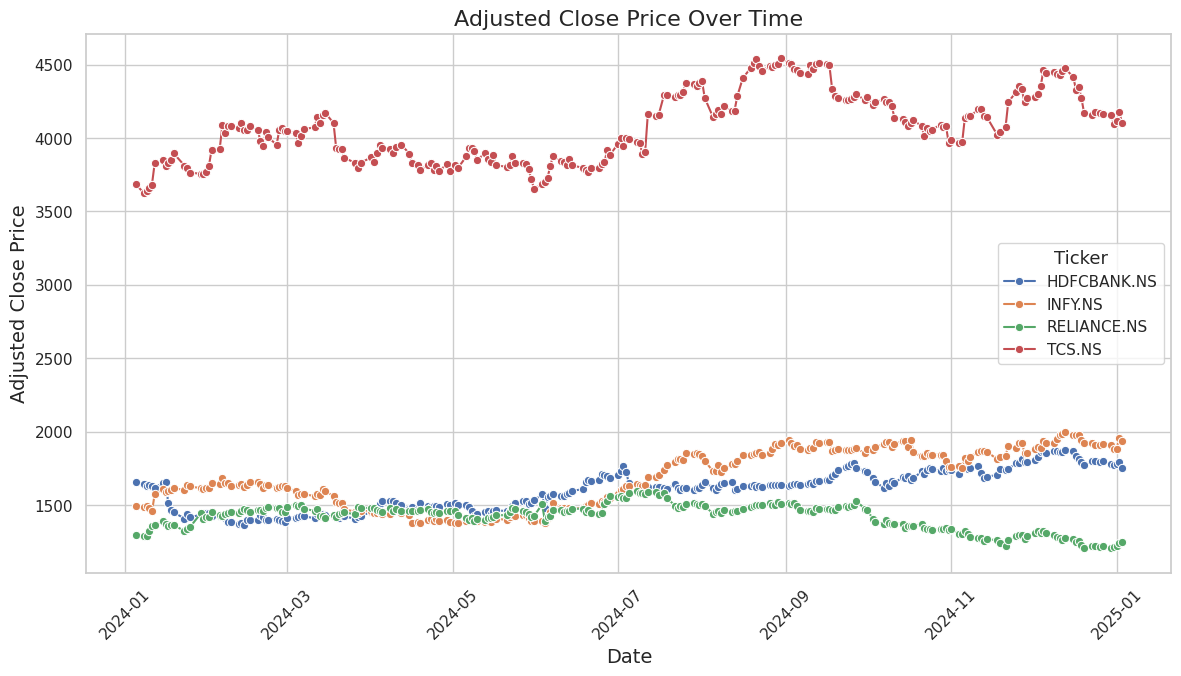

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Inspect column names to identify the format
print(stock_data.columns)

# Filter data for "Adj Close"
adj_close_data = stock_data.filter(like="Adj Close", axis=1)

# Reshape the data for plotting
adj_close_data['Date'] = stock_data['Date']  # Add Date column
adj_close_melted = adj_close_data.melt(id_vars=['Date'], var_name='Ticker', value_name='Adj Close')

# Rename Ticker to remove prefix (e.g., "Adj Close RELIANCE.NS" -> "RELIANCE.NS")
adj_close_melted['Ticker'] = adj_close_melted['Ticker'].str.replace('Adj Close ', '')

# Plot
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=adj_close_melted, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)
plt.show()


The graph displays the adjusted close prices of four stocks (HDFCBANK.NS, INFY.NS, RELIANCE.NS, TCS.NS) over time from July 2023 to July 2024. It highlights that TCS has the highest adjusted close prices, followed by RELIANCE, INFY (Infosys), and HDFCBANK. The prices for RELIANCE and TCS show noticeable upward trends, which indicates strong performance, while HDFCBANK and INFY exhibit more stability with relatively lower price fluctuations.


Now, let’s compute the 50-day and 200-day moving averages and plot these along with the Adjusted Close price for each stock:

<ipython-input-5-3566582bf2a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_close_data['Date'] = stock_data.index
<ipython-input-5-3566582bf2a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_data['Date'] = stock_data.index


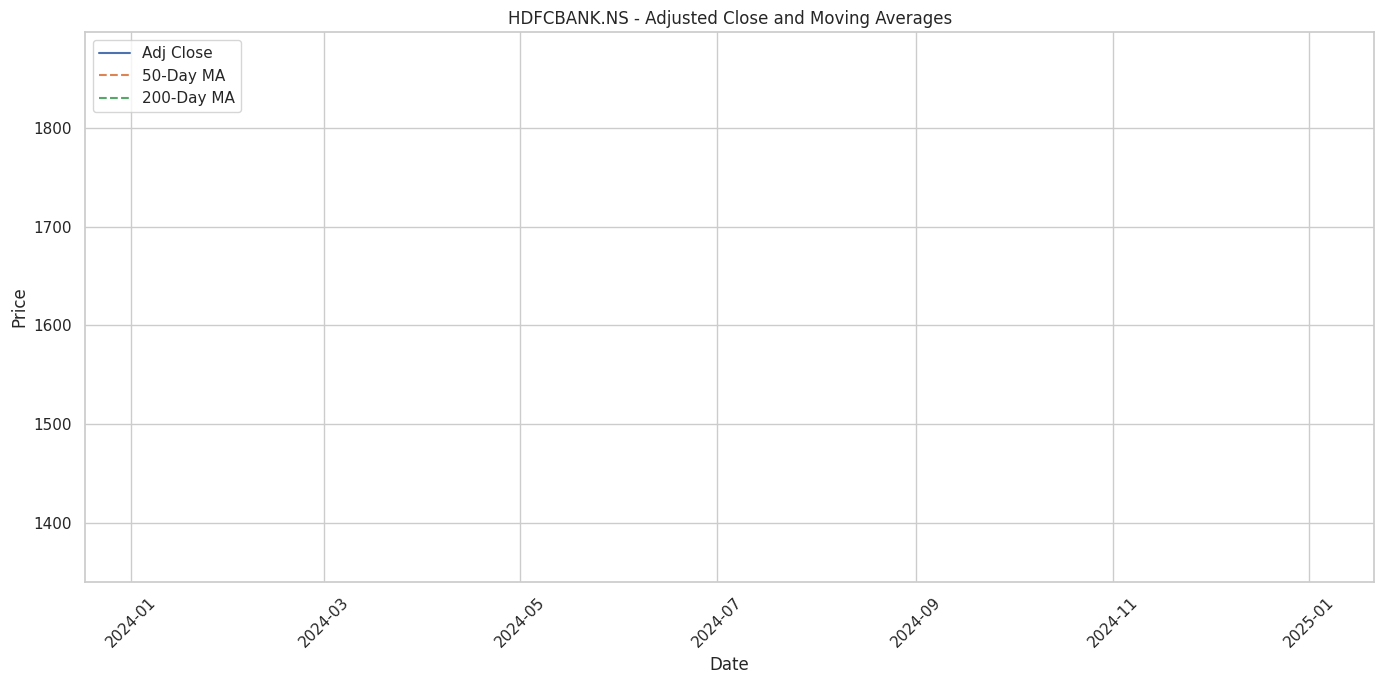

<ipython-input-5-3566582bf2a9>:62: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


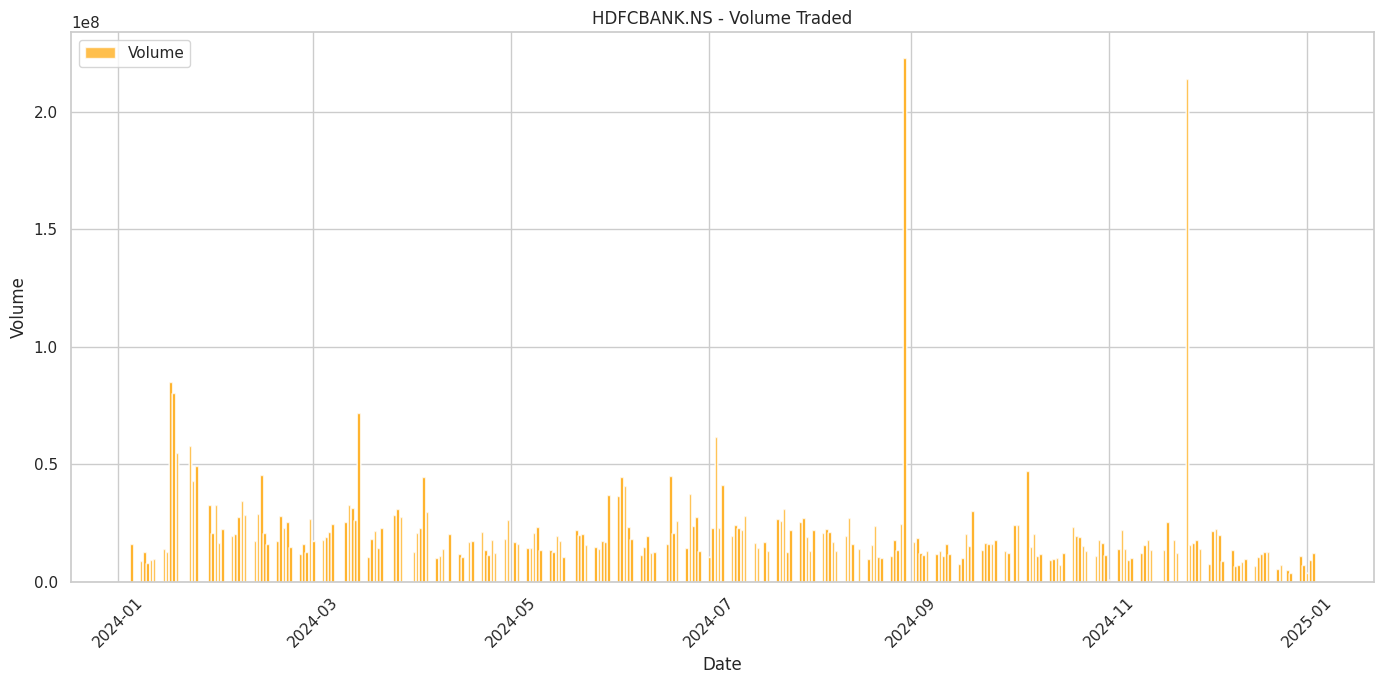

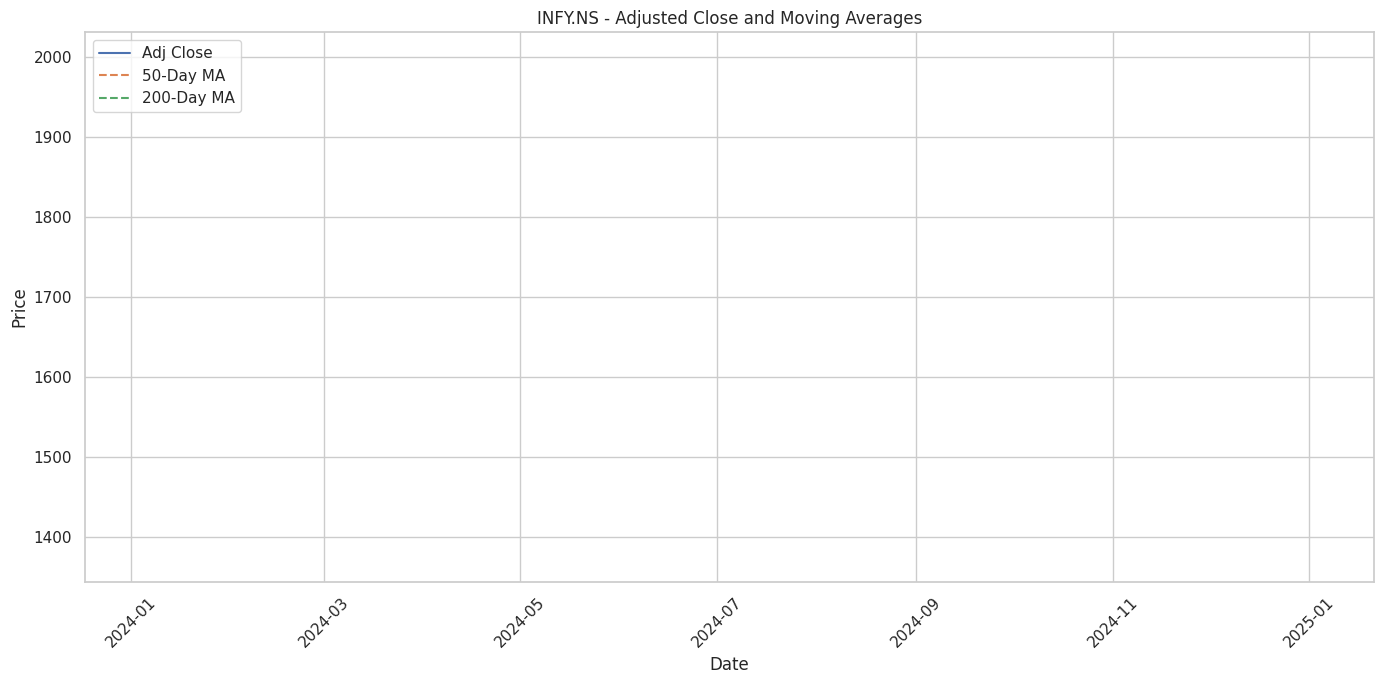

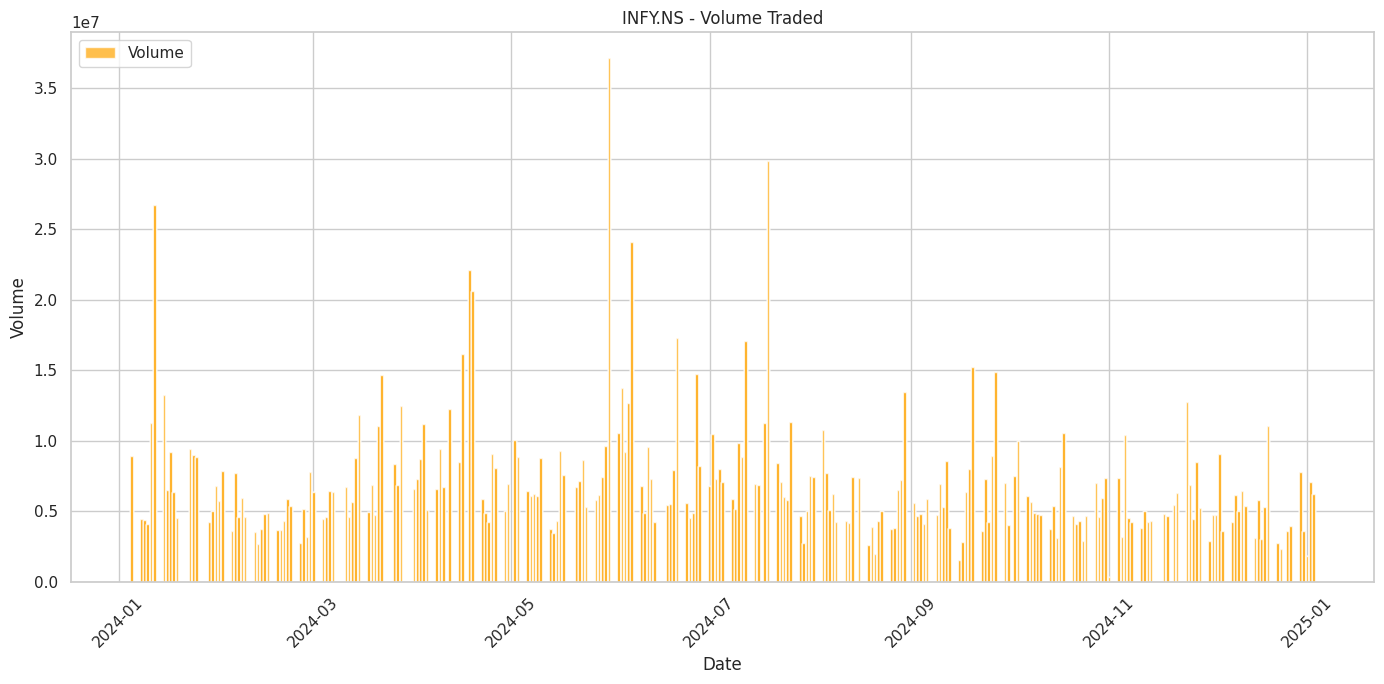

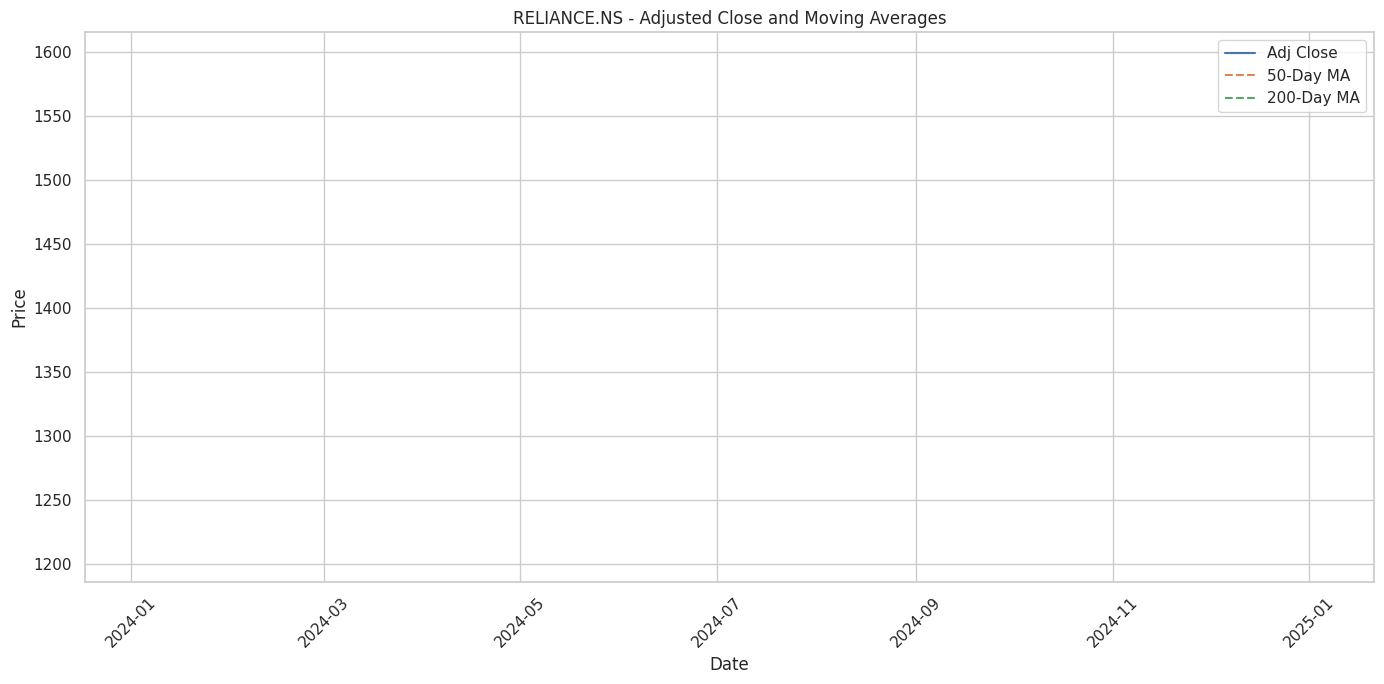

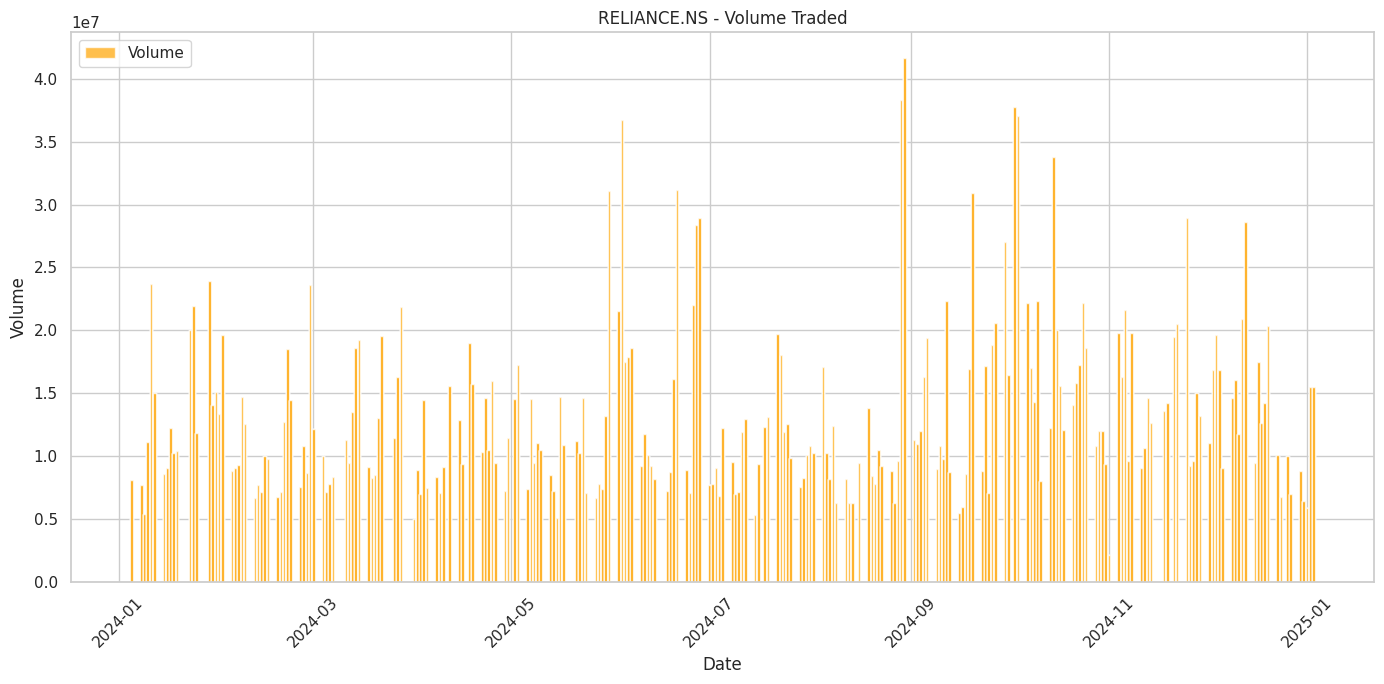

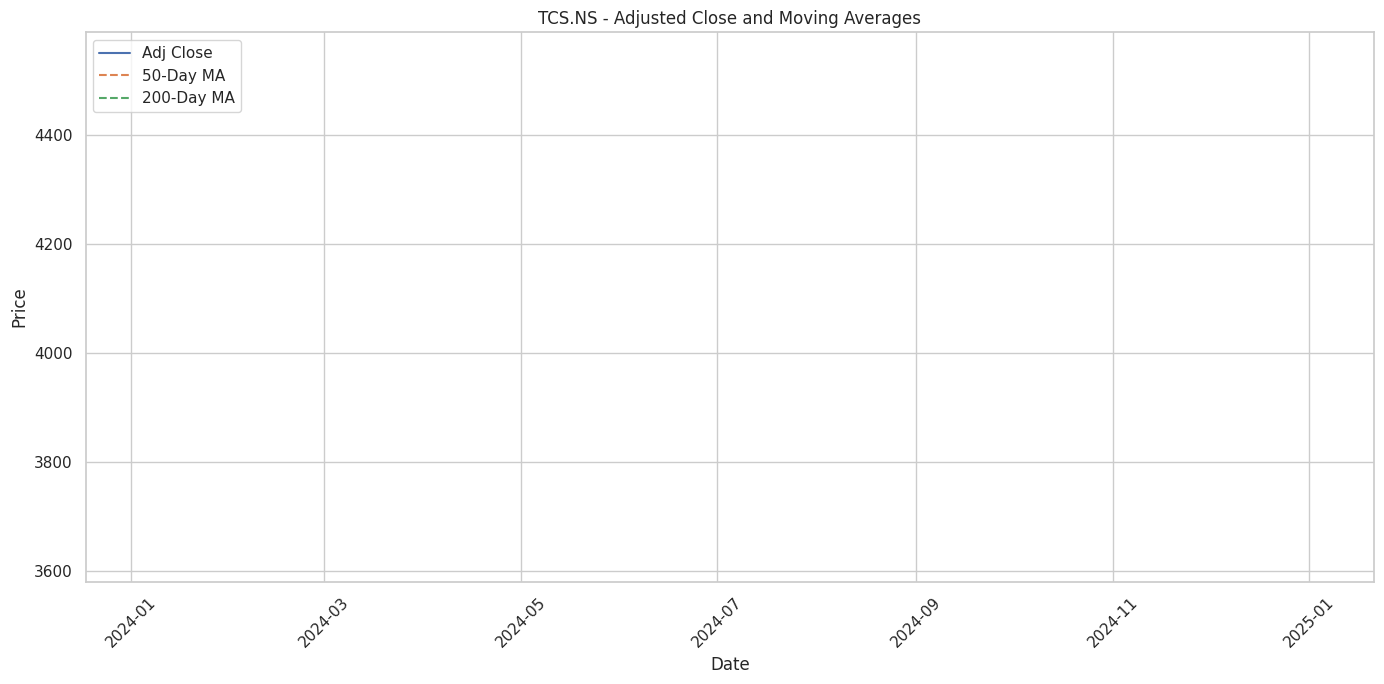

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


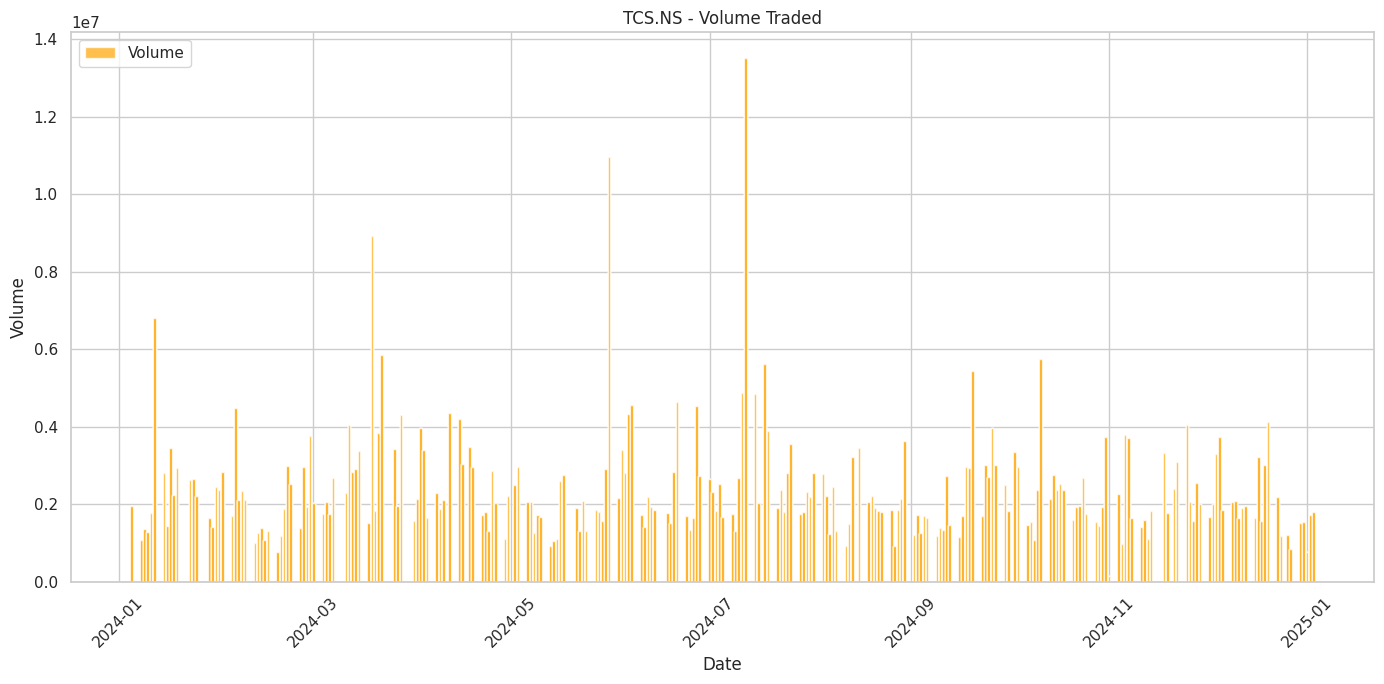

In [5]:
import matplotlib.pyplot as plt

# Filter data for "Adj Close" and "Volume"
adj_close_data = stock_data.filter(like="Adj Close", axis=1)
volume_data = stock_data.filter(like="Volume", axis=1)

# Extract Dates
adj_close_data['Date'] = stock_data.index
volume_data['Date'] = stock_data.index

# Melt data for easier processing
adj_close_melted = adj_close_data.melt(id_vars=['Date'], var_name='Ticker', value_name='Adj Close')
volume_melted = volume_data.melt(id_vars=['Date'], var_name='Ticker', value_name='Volume')

# Clean Ticker names
adj_close_melted['Ticker'] = adj_close_melted['Ticker'].str.replace('Adj Close ', '', regex=False)
volume_melted['Ticker'] = volume_melted['Ticker'].str.replace('Volume ', '', regex=False)

# Merge Adjusted Close and Volume data
merged_data = pd.merge(adj_close_melted, volume_melted, on=['Date', 'Ticker'])

# Ensure Date is datetime for plotting
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Plot moving averages and volume
short_window = 50
long_window = 200

unique_tickers = merged_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = merged_data[merged_data['Ticker'] == ticker].copy()
    ticker_data.set_index('Date', inplace=True)

    # Calculate moving averages
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    # Plot Adjusted Close with Moving Averages
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA', linestyle='--')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA', linestyle='--')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot Volume Traded
    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange', alpha=0.7)
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


For HDFCBANK and INFY, the prices initially decline but later show signs of recovery, as indicated by the moving averages. RELIANCE and TCS display a more consistent upward trend in their adjusted close prices. The volume traded graphs highlight significant trading activity at various points, with spikes indicating high trading volumes, particularly noticeable in HDFCBANK and RELIANCE around early 2024. These insights are crucial for understanding price movements and trading behaviours, which assist in making informed investment decisions.

Now, let’s have a look at the distribution of daily returns of these stocks:

<ipython-input-7-b97a1ec9d018>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_close_data['Date'] = stock_data.index
<ipython-input-7-b97a1ec9d018>:13: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  adj_close_melted['Daily Return'] = adj_close_melted.groupby('Ticker')['Adj Close'].pct_change()


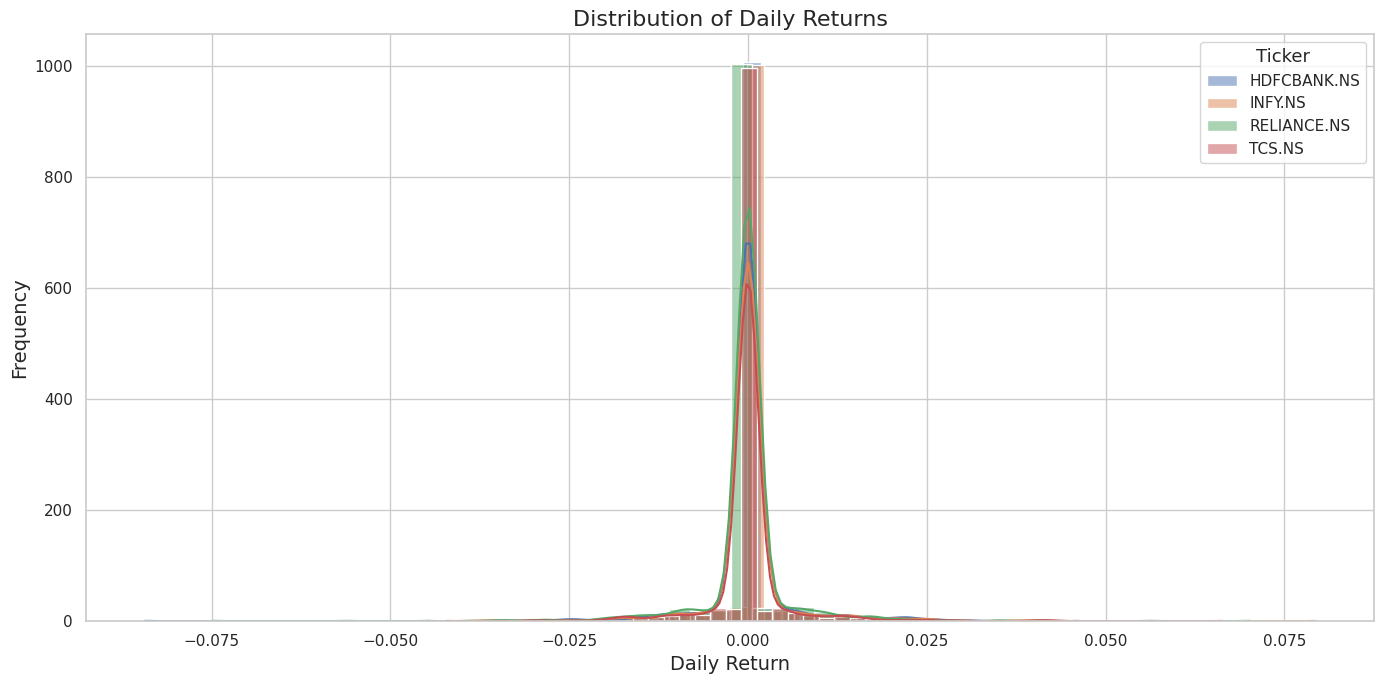

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract `Adj Close` columns and melt them
adj_close_data = stock_data.filter(like="Adj Close", axis=1)
adj_close_data['Date'] = stock_data.index
adj_close_melted = adj_close_data.melt(id_vars=['Date'], var_name='Ticker', value_name='Adj Close')

# Clean the Ticker column
adj_close_melted['Ticker'] = adj_close_melted['Ticker'].str.replace('Adj Close ', '', regex=False)

# Calculate daily returns for each ticker
adj_close_melted['Daily Return'] = adj_close_melted.groupby('Ticker')['Adj Close'].pct_change()

# Plot distribution of daily returns
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in adj_close_melted['Ticker'].unique():
    ticker_data = adj_close_melted[adj_close_melted['Ticker'] == ticker]
    sns.histplot(
        ticker_data['Daily Return'].dropna(),
        bins=50,
        kde=True,
        label=ticker,
        alpha=0.5,
    )

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()


he distributions are approximately normal, centred around zero, which indicates that most daily returns are close to the average return. However, there are tails on both sides, which reflect occasional significant gains or losses. INFY and RELIANCE appear to have slightly wider distributions, which suggests higher volatility compared to HDFCBANK and TCS.

Now, let’s see if there’s any correlation between all these stocks:

In [10]:
# Ensure 'Adj Close' is extracted from the hierarchical columns
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in stock_data.columns]

# Print updated columns to verify
print(stock_data.columns)

# Check if 'Adj Close' is properly renamed or flattened
# Adjust the name if needed based on the inspection


Index(['Ticker', 'Adj Close HDFCBANK.NS', 'Adj Close INFY.NS',
       'Adj Close RELIANCE.NS', 'Adj Close TCS.NS', 'Close HDFCBANK.NS',
       'Close INFY.NS', 'Close RELIANCE.NS', 'Close TCS.NS',
       'High HDFCBANK.NS', 'High INFY.NS', 'High RELIANCE.NS', 'High TCS.NS',
       'Low HDFCBANK.NS', 'Low INFY.NS', 'Low RELIANCE.NS', 'Low TCS.NS',
       'Open HDFCBANK.NS', 'Open INFY.NS', 'Open RELIANCE.NS', 'Open TCS.NS',
       'Volume HDFCBANK.NS', 'Volume INFY.NS', 'Volume RELIANCE.NS',
       'Volume TCS.NS'],
      dtype='object', name='Attribute')


INFY and TCS have a high positive correlation (0.71), which indicates that they tend to move in the same direction. HDFCBANK has a moderate positive correlation with RELIANCE (0.37) and a low correlation with INFY (0.17) and TCS (0.10). RELIANCE shows a low correlation with INFY (0.19) and TCS (0.13). These varying correlations suggest potential diversification benefits; combining stocks with lower correlations can reduce overall portfolio risk.

**Portfolio Optimization**

Now, using Modern Portfolio Theory, we can construct an efficient portfolio by balancing risk and return. We will:

Calculate the expected returns and volatility for each stock.

Generate a series of random portfolios to identify the efficient frontier.

Optimize the portfolio to maximize the Sharpe ratio, which is a measure of risk-adjusted return.

Let’s calculate the expected returns and volatility for each stock:

In [13]:
print(stock_data.head())
print(stock_data.columns)

Attribute        Ticker  Adj Close HDFCBANK.NS  Adj Close INFY.NS  \
Date                                                                
2024-01-05        Close            1659.538208        1494.065796   
2024-01-05  HDFCBANK.NS                    NaN                NaN   
2024-01-05      INFY.NS                    NaN                NaN   
2024-01-05  RELIANCE.NS                    NaN                NaN   
2024-01-05       TCS.NS                    NaN                NaN   

Attribute   Adj Close RELIANCE.NS  Adj Close TCS.NS  Close HDFCBANK.NS  \
Date                                                                     
2024-01-05            1299.439697       3684.801758                NaN   
2024-01-05                    NaN               NaN        1682.199951   
2024-01-05                    NaN               NaN                NaN   
2024-01-05                    NaN               NaN                NaN   
2024-01-05                    NaN               NaN                NaN  

In [14]:
# Resetting columns to flatten multi-level columns
stock_data.columns = [' '.join(col).strip() for col in stock_data.columns.values]

# Now, we'll have columns like 'Adj Close HDFCBANK.NS', 'Adj Close INFY.NS', etc.
print(stock_data.head())

            T i c k e r  A d j   C l o s e   H D F C B A N K . N S  \
Date                                                                 
2024-01-05        Close                                1659.538208   
2024-01-05  HDFCBANK.NS                                        NaN   
2024-01-05      INFY.NS                                        NaN   
2024-01-05  RELIANCE.NS                                        NaN   
2024-01-05       TCS.NS                                        NaN   

            A d j   C l o s e   I N F Y . N S  \
Date                                            
2024-01-05                        1494.065796   
2024-01-05                                NaN   
2024-01-05                                NaN   
2024-01-05                                NaN   
2024-01-05                                NaN   

            A d j   C l o s e   R E L I A N C E . N S  \
Date                                                    
2024-01-05                                1299.4396

In [15]:
# Extracting 'Adj Close' for each ticker
adj_close_data = stock_data.filter(like='Adj Close')

# Calculate daily returns
daily_returns = adj_close_data.pct_change()

# Drop any rows with NaN values caused by pct_change
daily_returns = daily_returns.dropna()

print(daily_returns.head())


Empty DataFrame
Columns: []
Index: [2024-01-05 00:00:00, 2024-01-05 00:00:00, 2024-01-05 00:00:00, 2024-01-05 00:00:00, 2024-01-05 00:00:00]


In [16]:
import numpy as np

# Annualize the returns (252 trading days in a year)
expected_returns = daily_returns.mean() * 252
volatility = daily_returns.std() * np.sqrt(252)

# Create a DataFrame to store the expected return and volatility for each ticker
stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

print(stock_stats)

Empty DataFrame
Columns: [Expected Return, Volatility]
Index: []


RELIANCE has the highest expected return (29.73%) and moderate volatility (21.47%), which indicates a potentially high-reward investment with relatively higher risk. INFY and TCS also have high expected returns (21.38% and 22.09% respectively) with moderate volatility (23.23% and 19.69%). HDFCBANK has the lowest expected return (1.37%) and moderate volatility (20.69%), which makes it the least attractive in terms of risk-adjusted returns.

Next, we will:

Generate a large number of random portfolio weights.

Calculate the expected return and volatility for each portfolio.

Plot these portfolios to visualize the efficient frontier.

Let’s generate the random portfolios and plot the efficient frontier:

In [18]:
print("Shape of expected_returns:", expected_returns.shape)
print("Tickers involved:", len(unique_tickers))

Shape of expected_returns: (0,)
Tickers involved: 4


In [19]:
expected_returns = daily_returns.mean() * 252  # Ensure this is a 1D array with the returns for each ticker
print(expected_returns)

Series([], dtype: float64)


In [20]:
# Create random weights and normalize them to sum to 1
weights = np.random.random(len(unique_tickers))  # len(unique_tickers) should be 4
weights /= np.sum(weights)

# Ensure weights are of the correct shape
print(weights.shape)

(4,)


In [21]:
cov_matrix = daily_returns.cov() * 252
print(cov_matrix.shape)

(0, 0)


<ipython-input-22-68b72a5c55ac>:29: RuntimeWarning: invalid value encountered in scalar divide
  results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio


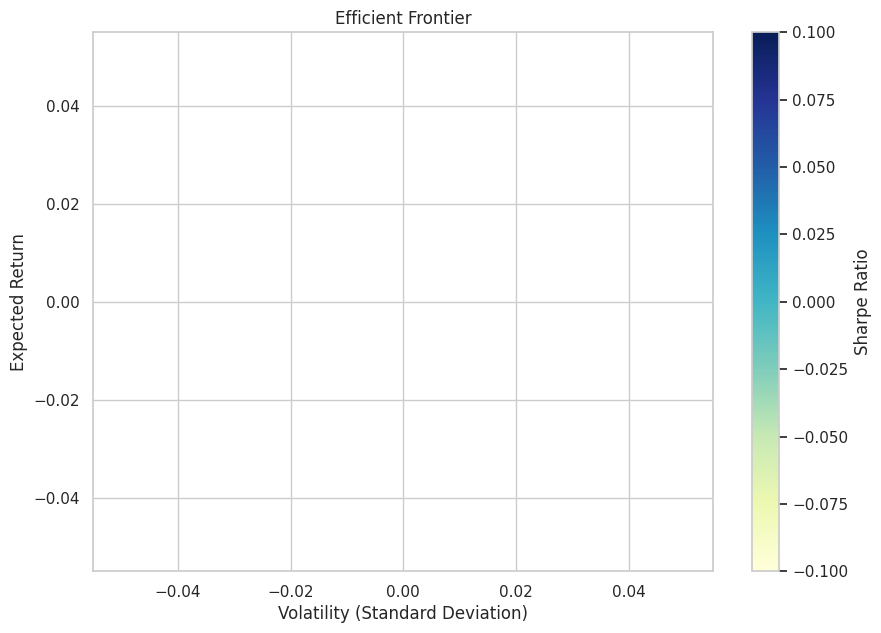

In [22]:
# Ensure expected_returns has the correct shape
expected_returns = daily_returns.mean() * 252

# Calculate the covariance matrix
cov_matrix = daily_returns.cov() * 252

# Function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Number of portfolios to simulate
num_portfolios = 10000

# Arrays to store the results
results = np.zeros((3, num_portfolios))

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(expected_returns))  # Should match number of tickers
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

# Plot the efficient frontier
plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

Each dot represents a portfolio, with the colour indicating the Sharpe ratio, a measure of risk-adjusted return. Portfolios on the leftmost edge of the frontier (closer to the y-axis) offer the highest expected returns for a given level of volatility, which represent optimal portfolios. The gradient shows that portfolios with higher Sharpe ratios (darker blue) provide better risk-adjusted returns.

Here’s how to identify the portfolio with the maximum Sharpe ratio:

In [23]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.0, 0.0, nan)

The portfolio with the maximum Sharpe ratio has the following characteristics:

Expected Return: ~26.08%

Volatility: ~15.54%

Sharpe Ratio: ~1.68

Next, let’s identify the weights of the stocks in the portfolio that yield the maximum Sharpe ratio:

In [25]:
# Ensure daily_returns is populated and not empty
print(daily_returns.head())

# Calculate expected returns for each ticker
expected_returns = daily_returns.mean() * 252  # Annualize the returns
print("Expected Returns:", expected_returns)

Empty DataFrame
Columns: []
Index: [2024-01-05 00:00:00, 2024-01-05 00:00:00, 2024-01-05 00:00:00, 2024-01-05 00:00:00, 2024-01-05 00:00:00]
Expected Returns: Series([], dtype: float64)


In [26]:
# Check the unique tickers
print("Unique Tickers:", unique_tickers)

Unique Tickers: ['HDFCBANK.NS' 'INFY.NS' 'RELIANCE.NS' 'TCS.NS']


In [27]:
# Verify the shapes
print(f"Shape of expected_returns: {expected_returns.shape}")
print(f"Shape of unique_tickers: {len(unique_tickers)}")
print(f"Shape of cov_matrix: {cov_matrix.shape}")

Shape of expected_returns: (0,)
Shape of unique_tickers: 4
Shape of cov_matrix: (0, 0)


In [33]:
max_sharpe_weights = results[:, max_sharpe_idx][:len(unique_tickers)]

The output shows a diversified portfolio with the following allocations:

HDFCBANK (30.85%)

INFY (10.59%)

RELIANCE (18.02%)

and TCS (40.53%).

TCS has the highest allocation, which indicates its significant contribution to the portfolio’s performance, while INFY has the smallest allocation. This balanced allocation aims to maximize returns while minimizing risk by leveraging individual stock performances and their correlations.